# QuickStart

Quick start tutorial

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from dynamiks.utils import doc_utils # use cached animations in sphinx documentation
from dynamiks.utils.test_utils import tfp
from dynamiks.views import Points, XView, XYView
from py_wake.utils.plotting import setup_plot

ws = 10 # mean wind speed
ti = 0.05 # turbulence intensity

To setup a flow simulation we need a `Site` some `WindTurbines`

## Site
The `Site` object is provides the wind speed and turbulence intensity at given position and time (x,y,z,time)

For DWM we can use a the `TurbulenceFieldSite`, which takes a turbulenceField object or function as input.
In this example we will use a `MannTurbulenceField`

In [2]:
from dynamiks.sites import TurbulenceFieldSite
from dynamiks.sites.turbulence_fields import MannTurbulenceField

tf = MannTurbulenceField.from_netcdf(filename = tfp + "mann_turb/hipersim_mann_l29.4_ae1.0000_g3.9_h0_1024x128x32_3.200x3.20x3.20_s0001.nc")
tf.scale_TI(TI=ti, U=ws)

In [3]:
site = TurbulenceFieldSite(ws=ws, turbulenceField=tf, turbulence_offset=(-2500,-200,20))

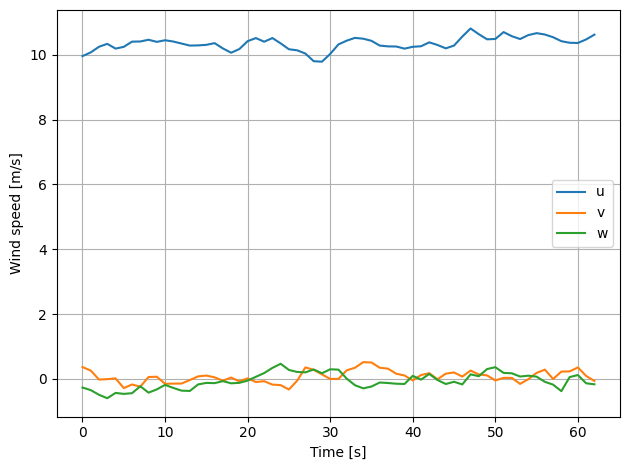

In [4]:
time = range(200)
view = XView(x=range(200), y=0, z=70)
uvw = site.get_windspeed(view)
for i, n in enumerate('uvw'):
    plt.plot(uvw[i], label=n)
setup_plot(ylabel='Wind speed [m/s]', xlabel='Time [s]')

## WindTurbines

The simplest wind turbine model provides power and a ct based on rotor center wind speed.

For this purpose PyWake wind turbines are sufficient. They can be used via the wrapper, `PyWakeWindTurbine`.

In [5]:
from dynamiks.wind_turbines import PyWakeWindTurbines
from py_wake.examples.data.hornsrev1 import V80

wts = PyWakeWindTurbines(x=[0,500], y=[0,0],   # x and y position of two wind turbines
                         windTurbine=V80())

# print diameter and hub height
wts[0].diameter(), wts[0].hub_height()

(array([80.]), array([70.]))

## FlowSimulation

In [6]:
from dynamiks.dwm import DWMFlowSimulation
from dynamiks.dwm.particle_deficit_profiles.ainslie import jDWMAinslieGenerator

fs = DWMFlowSimulation(site=site, 
                       windTurbines=wts, 
                       particleDeficitGenerator=jDWMAinslieGenerator(), 
                       dt=1, # time step [s]
                       d_particle=.2, # distance between particles, normalized with wind turbine diameter
                      )

In [7]:
fs.run(100) # run 100s

### Visualize flow

In [8]:
fig = plt.figure(figsize=(10,4))
view = XYView(z=70, x= np.arange(-200,1200,5), y=np.arange(-200,200,5), ax=fig.gca())
fs.visualize(fs.time+10, view=view, id='QuickStart')

### Animate flow

Make and save a gif animation with the next 10s

  0%|          | 0/10 [00:00<?, ?it/s]

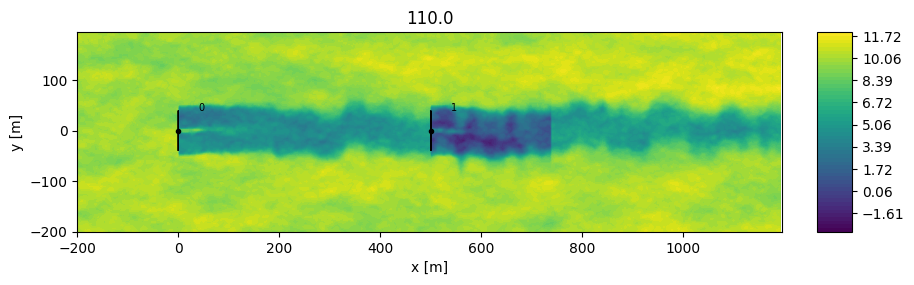

In [9]:
fig = plt.figure(figsize=(10,4))
view = XYView(z=70, x= np.arange(-200,1200,5), y=np.arange(-200,200,5), ax=fig.gca())
ani = fs.animate(fs.time+10, filename='visualization.gif', view=view);

Show the gif animation

In [10]:
from IPython.display import HTML
HTML('<img src="visualization.gif">')